# Weather Canada

Description:
This project involves creating visual representations and clustering key weather metrics to characterize the climate conditions in 10 major Canadian cities. The selected cities are 
-Regina
-Toronto
-Montreal
-Calgary
-Ottawa 
-Halifax
-Edmonton
-Winnipeg
-Vancouver 
-Kitchener-Waterloo. 
The data spans the last three years (2021-2023) and is consiledated and organized on a monthly basis.

Purpose:
The primary objective of this undertaking is to assist residents currently domiciled in Canada in strategizing their travel itineraries to the subsequent cities, utilizing a comprehensive weather database spanning the preceding three years.

Data-sources:
1)Main-Database: https://www.weatherstats.ca/download.html  
2)Toronto : https://toronto.weatherstats.ca/download.html 
3)Montreal : https://montréal.weatherstats.ca/download.html
4)Calgary : https://calgary.weatherstats.ca/download.html
5)Ottawa : https://ottawa.weatherstats.ca/
6)Halifax : https://halifax.weatherstats.ca/download.html
7)Edmonton : https://edmonton.weatherstats.ca/download.html
8)Winnipeg : https://winnipeg.weatherstats.ca/download.html
9)Vancouver : https://weather.gc.ca/city/pages/bc-74_metric_e.html
10)Kitchener-Waterloo : https://weather.gc.ca/city/pages/on-82_metric_e.html

The datasets sourced from the aforementioned origins have been amalgamated in the Excel format.

Key-Metrics:
1)Average Temperature
2)Average wind speed
3)Precepetation
4)Snow on ground

# Libraries:


In [100]:
# Importing important libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Database:

In [16]:
# Loading the consolidated databases
Weather = pd.read_csv('Weather_consoledated_data .csv')
Weather

,Year,Month,City,date,max_temperature_v,min_temperature_v,Avg_temp,max_wind_speed_v,min_wind_speed_v,Average_wind_speed,precipitation_v,snow_on_ground_v
0,2023,12,Regina,01-12-2023,-7.16,-17.19,-12.175,30.15,6.65,18.37,12.18,6.5
1,2023,11,Regina,01-11-2023,0.42,-10.31,-4.945,30.08,6.80,18.79,13.74,2.7
2,2023,10,Regina,01-10-2023,10.82,-2.15,4.335,30.77,6.96,18.45,26.71,0.7
3,2023,9,Regina,01-09-2023,20.14,4.99,12.565,29.93,6.07,16.91,28.89,0.4
4,2023,8,Regina,01-08-2023,25.39,10.32,17.855,27.75,5.46,16.80,57.43,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021,5,Kitchenerwaterloo,01-05-2021,33.10,-4.40,14.350,71.00,34.65,52.80,160.00,1.0
356,2021,4,Kitchenerwaterloo,01-04-2021,29.20,-16.10,6.550,72.00,33.50,52.80,145.30,18.0
357,2021,3,Kitchenerwaterloo,01-03-2021,26.50,-27.80,-0.650,74.00,41.03,57.50,148.10,77.0
358,2021,2,Kitchenerwaterloo,01-02-2021,16.80,-34.10,-8.650,67.00,41.54,54.30,112.80,74.0


In [17]:
Weather = pd.DataFrame(Weather)
Weather

,Year,Month,City,date,max_temperature_v,min_temperature_v,Avg_temp,max_wind_speed_v,min_wind_speed_v,Average_wind_speed,precipitation_v,snow_on_ground_v
0,2023,12,Regina,01-12-2023,-7.16,-17.19,-12.175,30.15,6.65,18.37,12.18,6.5
1,2023,11,Regina,01-11-2023,0.42,-10.31,-4.945,30.08,6.80,18.79,13.74,2.7
2,2023,10,Regina,01-10-2023,10.82,-2.15,4.335,30.77,6.96,18.45,26.71,0.7
3,2023,9,Regina,01-09-2023,20.14,4.99,12.565,29.93,6.07,16.91,28.89,0.4
4,2023,8,Regina,01-08-2023,25.39,10.32,17.855,27.75,5.46,16.80,57.43,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021,5,Kitchenerwaterloo,01-05-2021,33.10,-4.40,14.350,71.00,34.65,52.80,160.00,1.0
356,2021,4,Kitchenerwaterloo,01-04-2021,29.20,-16.10,6.550,72.00,33.50,52.80,145.30,18.0
357,2021,3,Kitchenerwaterloo,01-03-2021,26.50,-27.80,-0.650,74.00,41.03,57.50,148.10,77.0
358,2021,2,Kitchenerwaterloo,01-02-2021,16.80,-34.10,-8.650,67.00,41.54,54.30,112.80,74.0


# Data-Cleaning: 


In [18]:
# Getting the info about data types.
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                360 non-null    int64  
 1   Month               360 non-null    int64  
 2   City                360 non-null    object 
 3   date                360 non-null    object 
 4   max_temperature_v   360 non-null    float64
 5   min_temperature_v   360 non-null    float64
 6   Avg_temp            360 non-null    float64
 7   max_wind_speed_v    360 non-null    float64
 8   min_wind_speed_v    360 non-null    float64
 9   Average_wind_speed  360 non-null    float64
 10  precipitation_v     360 non-null    float64
 11  snow_on_ground_v    360 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 33.9+ KB


In [19]:
# Changing the data type of month column of the dataframe to object.

Weather['Month'] = Weather['Month'].infer_objects()
Weather['Month']


0      12
1      11
2      10
3       9
4       8
       ..
355     5
356     4
357     3
358     2
359     1
Name: Month, Length: 360, dtype: int64

In [20]:
Weather['Month'].replace(1,'Jan',regex=True,inplace=True)
Weather['Month'].replace(11,'Nov',regex=True,inplace=True)
Weather['Month'].replace(2,'Feb',regex=True,inplace=True)
Weather['Month'].replace(3,'Mar',regex=True,inplace=True)
Weather['Month'].replace(4,'Apr',regex=True,inplace=True)
Weather['Month'].replace(5,'May',regex=True,inplace=True)
Weather['Month'].replace(6,'Jun',regex=True,inplace=True)
Weather['Month'].replace(7,'Jul',regex=True,inplace=True)
Weather['Month'].replace(8,'Aug',regex=True,inplace=True)
Weather['Month'].replace(9,'Sep',regex=True,inplace=True)
Weather['Month'].replace(10,'Oct',regex=True,inplace=True)
Weather['Month'].replace(12,'Dec',regex=True,inplace=True)
Weather

,Year,Month,City,date,max_temperature_v,min_temperature_v,Avg_temp,max_wind_speed_v,min_wind_speed_v,Average_wind_speed,precipitation_v,snow_on_ground_v
0,2023,Dec,Regina,01-12-2023,-7.16,-17.19,-12.175,30.15,6.65,18.37,12.18,6.5
1,2023,Nov,Regina,01-11-2023,0.42,-10.31,-4.945,30.08,6.80,18.79,13.74,2.7
2,2023,Oct,Regina,01-10-2023,10.82,-2.15,4.335,30.77,6.96,18.45,26.71,0.7
3,2023,Sep,Regina,01-09-2023,20.14,4.99,12.565,29.93,6.07,16.91,28.89,0.4
4,2023,Aug,Regina,01-08-2023,25.39,10.32,17.855,27.75,5.46,16.80,57.43,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021,May,Kitchenerwaterloo,01-05-2021,33.10,-4.40,14.350,71.00,34.65,52.80,160.00,1.0
356,2021,Apr,Kitchenerwaterloo,01-04-2021,29.20,-16.10,6.550,72.00,33.50,52.80,145.30,18.0
357,2021,Mar,Kitchenerwaterloo,01-03-2021,26.50,-27.80,-0.650,74.00,41.03,57.50,148.10,77.0
358,2021,Feb,Kitchenerwaterloo,01-02-2021,16.80,-34.10,-8.650,67.00,41.54,54.30,112.80,74.0


# Data Visualization:

# 1) Line Chart

In [21]:
Temperature = Weather.groupby('City').agg({'Avg_temp':'mean'})
Temperature  

,Avg_temp
City,
Calgary,4.502083
Edmonton,-7.566667
Halifax,0.901389
Kitchenerwaterloo,7.063889
Montreal,6.175000
Ottawa,6.546944
Regina,2.818056
Toronto,7.631944
Vancouver,9.533333


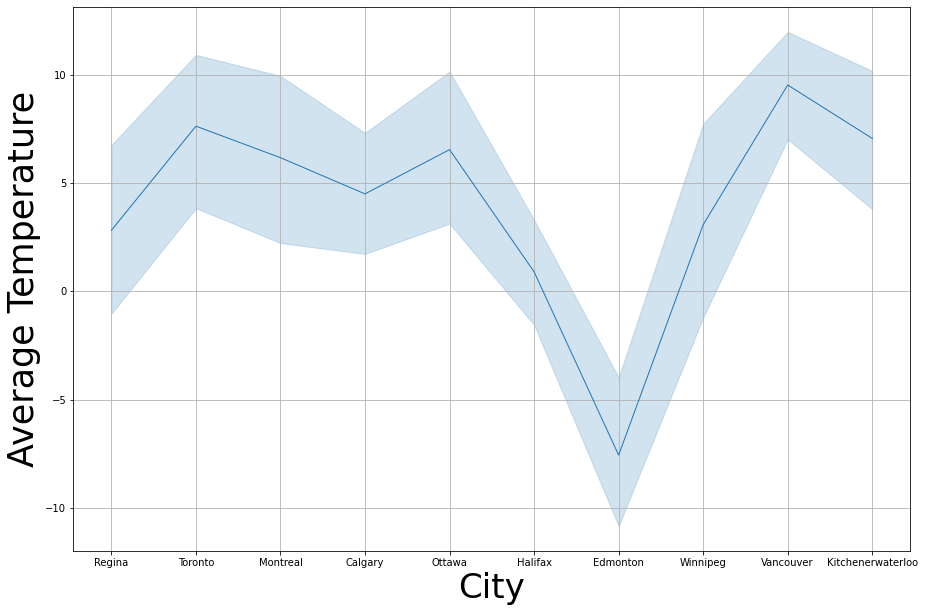

In [22]:
# Average temperature of Cities in the past 3 years using line chart.
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='City',y='Avg_temp', data = Weather,linewidth=1)
plt.xlabel('City',fontsize=34)
plt.ylabel('Average Temperature',fontsize=35)
plt.grid()
plt.show()



Insights:
1)Edmonton has been the city with lowest average temperature in the past 3 years.
2)Vancouver has been the city with highest average temperature in the past 3 years

# 2) Scatter plot

In [23]:
Windspeed = Weather.groupby('City').agg({'Average_wind_speed':'mean'})
Windspeed  

,Average_wind_speed
City,
Calgary,15.354167
Edmonton,33.666667
Halifax,42.500000
Kitchenerwaterloo,50.883333
Montreal,38.861111
Ottawa,14.243611
Regina,18.106944
Toronto,42.194444
Vancouver,55.108333


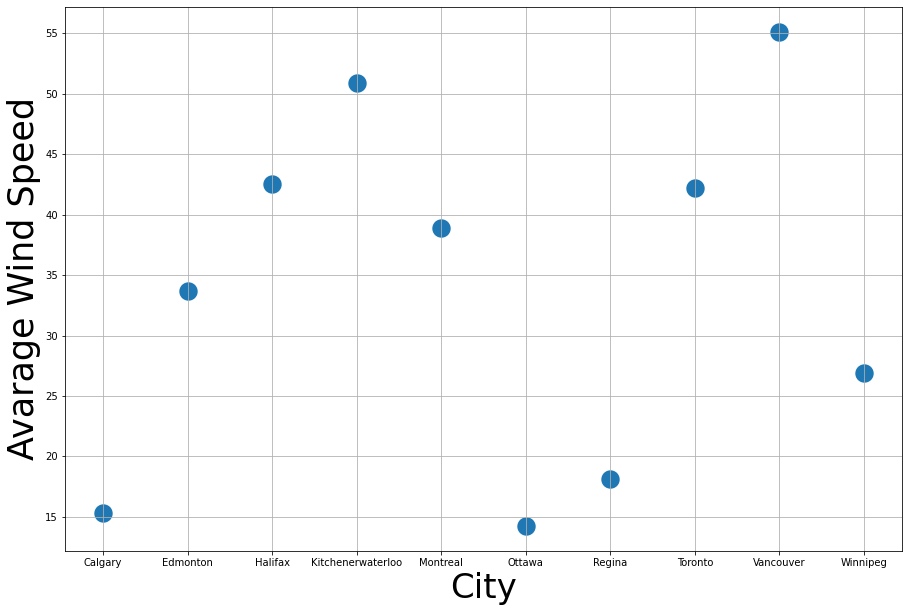

In [24]:
# Average wind speed of the cities in the past 3 years.
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='City',y='Average_wind_speed', data = Windspeed,s=400)
plt.xlabel('City',fontsize=34)
plt.ylabel('Avarage Wind Speed',fontsize=35)
plt.grid()
plt.show()


Insight:
1)Average 3 year wind highest in Vancouver.
2)Average 3 year wind lowest in Ottawa.

# 3) Heatmap

In [25]:
# Heatmap showing the correlation between Average precipetatoin and  windspeed.
PREC = Weather.groupby('City').agg({'Average_wind_speed':'mean','precipitation_v':'mean'})
PREC

,Average_wind_speed,precipitation_v
City,,
Calgary,15.354167,36.731111
Edmonton,33.666667,127.933333
Halifax,42.500000,284.266667
Kitchenerwaterloo,50.883333,156.675000
Montreal,38.861111,208.627778
Ottawa,14.243611,77.738889
Regina,18.106944,32.012778
Toronto,42.194444,164.200000
Vancouver,55.108333,218.375000


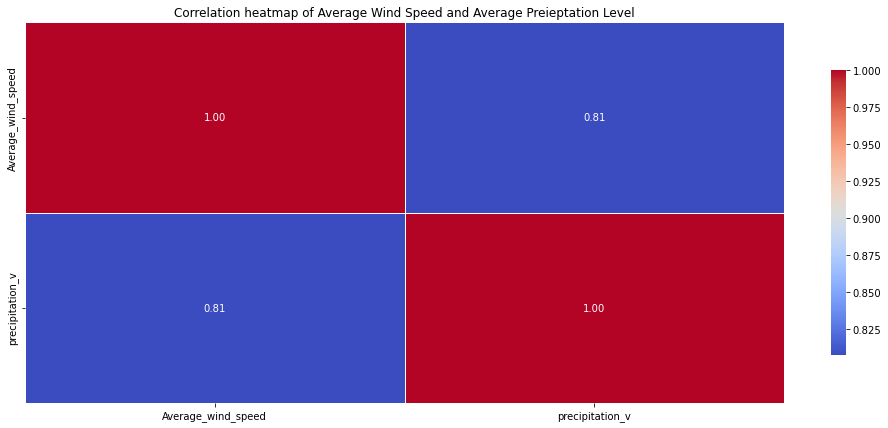

In [26]:
 
Correlation = PREC.corr()
plt.figure(figsize=(17,7))
sns.heatmap(Correlation,annot=True,fmt=".2f", cmap="coolwarm", linewidths=.5, cbar_kws={"shrink": 0.75})
plt.title('Correlation heatmap of Average Wind Speed and Average Preieptation Level')
plt.show()

Insights:There Exsists a strong positive association between average wind speed and average precipetation levels 

# 4) Pie-Chart

In [64]:
# Pie plot of precipetation levels during months
Prec_petation = Weather.groupby('Month').agg({'precipitation_v':'mean'})
Prec_petation = pd.DataFrame(Prec_petation)
Prec_petation

,precipitation_v
Month,
Apr,135.724000
Aug,163.038667
Dec,119.024000
Feb,113.278333
Jan,111.835333
Jul,158.933333
Jun,173.737667
Mar,127.341333
May,163.781667


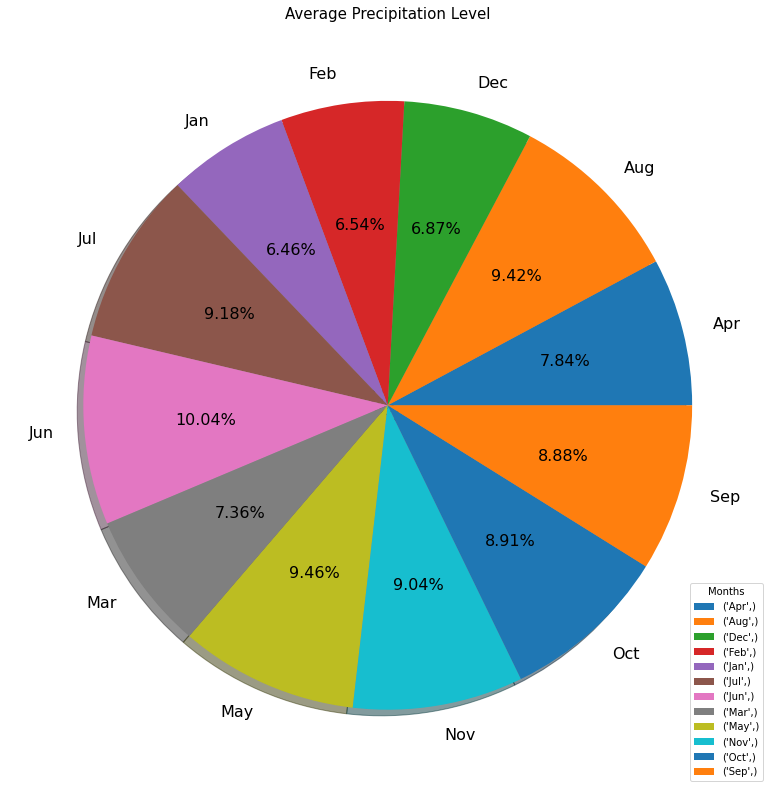

In [88]:
plt.figure(figsize=(14,14))
Subject = ['Apr',
'Aug',
'Dec',
'Feb',
'Jan',
'Jul',
'Jun',
'Mar',
'May', 
'Nov',
'Oct',
'Sep']
Average_Precepitation_level = [135.724000,
163.038667,
119.024000,
113.278333,
111.835333,
158.933333,
173.737667,
127.341333,
163.781667,
156.540000,
154.296333,
153.728667]
plt.pie(Average_Precepitation_level,labels=Subject,autopct="%0.2f%%",textprops={'fontsize': 16},shadow = True)
plt.legend(title="Months", loc="lower right", labels=[f"{Subject}" for Subject in zip(Subject)])
plt.title('Average Precipitation Level',fontsize=15)
plt.show()

Insight: The average precipitation level has been high in the month of June.  

# Cluster Analysis :

In [91]:
# Hierarchical Clustering of the months in the previous 3 years in which, snow on ground are simmliar in terms of millimeter (mm).  
On_ground_snow = Weather.groupby('Month').agg({'snow_on_ground_v':'mean'})
On_ground_snow

,snow_on_ground_v
Month,
Apr,19.776667
Aug,5.340000
Dec,33.516667
Feb,40.656667
Jan,40.980000
Jul,5.600000
Jun,6.000000
Mar,38.930000
May,8.760000


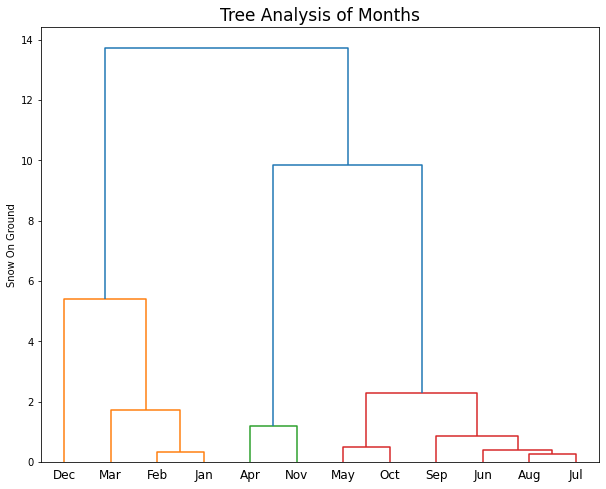

In [117]:
# Dendrogram
plt.figure(figsize=(10,8))

plt.ylabel('Snow On Ground')
Z= linkage(On_ground_snow,method='single',)
dendrogram(Z,labels=On_ground_snow.index)
plt.title('Tree Analysis of Months',fontsize=17)
plt.show()

Insight:
In order to analyse our result, we have decided to draw a cutt off line at 6 in to form the following clusters in hierarchy which can be seen as follows:-
a) Cluster-1: December, March, February, January
b) Cluster-2: April, November
c) Cluster-3: May,October, September, June, August, July

Therefore, the snow on ground is maximum during the month of December, March, February and January. 